<h1>ASTR3050 Luminosity, Flux and Magnitudes Worksheet</h1>

In [1]:
#We will always begin by importing modules we will be using
import numpy as np
from astropy import units as u
import sqlite3
import matplotlib.pyplot as plt
import astropy.io.ascii as ascii
import ipywidgets as widgets
from ipywidgets import interact

<big> In astronomy, the <b><font color=blue>luminosity</font></b> of a star is the total energy per second it emits.  The units of luminosity are J/s (metric units) or erg/s (cgs units). Note that 1 J/s = 1 Watt, so luminosity is actually a meaure of <em>power.</em><p>
    
The luminosity of our Sun is $L_{\odot} = 3.827\times 10^{26}\,$Watts.<p>
    
We can use the <tt>astropy.units</tt> module to define entire physical <em>quantities</em> in Python: numbers plus units. <p>
    
Let's define a <em>quantity</em> to represent to luminosity of the sun, <tt>l_sun</tt>.  We do this by multiplying a floating point number by a <em>unit</em>.  The unit of Watts can be created by the <tt>astropy.units</tt> module with the syntax <tt>u.watt</tt>. For example,</big>

In [2]:
l_sun = 3.827e26 * u.watt
print(l_sun)

3.827e+26 W


<big> <b><font color=blue>Flux</font></b> is the amount of energy per unit time per unit area flowing through a (real or imaginary) surface.  It's units are J/s/m$^2$ (metric units) or erg/s/cm$^2$ (cgs units).
 
<h4>Question 1:</h4> If the radius of our sun is $R_{\odot} = 6.955\times 10^8\,$m, what is the flux through it's surface?<p>

<li> Start by defining a <em>quantity</em>, <tt>r_sun</tt>, to represent the Sun's radius.  (Hint: units of meters are given by <tt>u.m</tt>)

<li> Now you should be able to write down an expression for the surface area of the sun in terms of its radius (hint: What is the surface area of a sphere?  You can use <tt>np.pi</tt> for the number $\pi$)

<li> Now you can write down an expression for surface flux, <tt>fsurf_sun</tt> by dividing luminosity by area<p>
   
    
<li> Look for the ##### prompts for lines of code you must complete.

In [3]:
#Use this cell to code your solution for question #1

r_sun = 6.955e8 * u.m #radius of the sun
area_sun = 4*np.pi *r_sun**2 #surface area of the sun
fsurf_sun = l_sun / (area_sun) #surface flux of the sun
print(fsurf_sun)

62958493.80015447 W / m2


<font color=red>Instructor solution for question #1 - double click to view</font>
<!--
r_sun = 6.955e8 * u.m #radius of the sun
area_sun = 4*np.pi *r_sun**2 #surface area of the sun
fsurf_sun = l_sun / (area_sun) #surface flux of the sun
print(fsurf_sun)
-->

<big><h4>Question 2 (a):</h4> The fluxes we measure for distant stars (using telescopes on the earth) are much smaller than their surface fluxes, because the total energy is spread out over a larger and larger area as distance increases:<p>
    $F = \frac{L}{4\pi d^2}$ (1)
 
<p>
    
    If you are observing a sun-like star that is 4 light years away, what flux would you measure at the position of the Earth?

<li> Define the distance to the star, <tt>d</tt> (Hint: the unit for light year is <tt>u.lyr</tt>)
<li> Calculate the flux at the Earth as a function of <tt>l_sun</tt> and the distance, <tt>d</tt>.

</big>

In [4]:
#Use this cell to code your solution for question #2a

d = 4.0 * u.lyr #distance to star
flux = (l_sun/(4*np.pi*d**2))
print(flux)

1.9033936475396358e+24 W / lyr2


<font color=red>Instructor solution for question #2a  - double click to view</font>
<!--
d = 4.0 * u.lyr #distance to star
flux = (l_sun/(4*np.pi*d**2))
print(flux)
--> 

<big>When you print the result to question 2, the units are Watt/ly$^2$.   <em><b>What if we want the flux in W/m$^2$?</em></b>
<p>
We can define a new unit: <tt>w_m2 = u.watt/u.m**2 </tt>
    <p>
        Then we can convert our result to this new unit using the <tt>.to()</tt> method, E.g.
    

In [5]:
w_m2 = u.watt/u.m**2
print(flux.to(w_m2))

2.1265680052480402e-08 W / m2


<big> Try changing the distance in part 2(a) to 1AU, and checking your result against the value of the solar irradiance (solar constant) that you can look up online!

<big><h4>Question 2 (b):</h4> Try out some unit conversions for yourself:<p>
    
   <li> First, try converting the distance from part (a) from light years to parsecs (u.pc).  How many light years are in one parsec?
    
   <li> Next, try converting the flux from part (a) to cgs units of erg/s/cm$^2$.  To do this you will first have to define a new unit <tt>erg_s_cm2</tt> as we did for W/m$^2$ above.
    
   <li>Don't forget to view your results with a print(...) statement!

In [6]:
#Use this cell to code your solution for question #2b

print(d.to(u.pc))
d1 = 1*u.pc
print(d1.to(u.lyr))
erg_s_cm2 = u.erg/u.s/u.cm**2
print(flux.to(erg_s_cm2))

1.2264055751518108 pc
3.26156377714188 lyr
2.12656800524804e-05 erg / (cm2 s)


<font color=red>Instructor solution for question #2b  - double click to view</font>

<!--
print(d.to(u.pc))
d1 = 1*u.pc
print(d1.to(u.lyr))
erg_s_cm2 = u.erg/u.s/u.cm**2
print(flux.to(erg_s_cm2))
-->


<big><h4>Question 2 (c):</h4> The telescope you are using collects light using a 4-m mirror (in diameter) and focusses it onto a camera.  How much total energy is received from the star in a 30 second exposure? <p>
 
    
   <li> What is the telescope's light collecting area?  How long does it collect light for? 
    
   <li> Flux has units of energy/s/m$^2$.  Use the flux that you calculated in part (a) to determine the total energy collected by the telescope in 30 s.<p>
    
   <li> Express your result in units of Joules (<tt>u.J</tt>)




In [7]:
#Use this cell to code your solution for question #2c

radius = 2. * u.m
tel_area = np.pi * radius**2
time = 30. * u.s
total_energy = flux * tel_area * time
print(total_energy.to(u.J))


8.016972507175612e-06 J


<font color=red>Instructor solution for question #2c  - double click to view</font>

<!--
radius = 2. * u.m
tel_area = np.pi * radius**2
time = 30. * u.s
total_energy = flux * tel_area * time
print(total_energy.to(u.J))
-->


<big>Astronomers often describe star brightnesses in terms of <font color=blue><b>mangitudes</b></font> rather than fluxes. All magnitudes are all defined <em>relative</em> to other magnitudes: <p>
    $m_1 - m_2 = -2.5\log{F_1/F_2}$ (2)
 
<p>
    
Often in astronomy, we use the star Vega as our reference, defining $m_{Vega}=0$, irrespetive of wavelength.  Then our equation for magnitude becomes:
<p>
    $m = -2.5\log{F/F_{Vega}}$ (3)
<p>

<h4>Question 3:</h4> 
Star A has a magnitude of 0 and star B has a magnitude of 25. How much brighter is Star A than Star B?

In [8]:
#Use this cell to code your solution for question #3

m1=0
m2=25
f1_f2 = 10**((m1-m2)/(-2.5))
print(f1_f2)
#Star A is 10 billion times brighter than Star B

10000000000.0


<font color=red>Instructor solution for question #3  - double click to view</font>

<!--
m1=0
m2=25
f1_f2 = 10**((m1-m2)/(-2.5))
print(f1_f2)
#Star A is 10 billion times brighter than Star B
-->

<big>
    As you can see from question 3, the magnitude scale is a logarithmic scale that effectively compresses many orders of mangitude in brightness into a simple scale from around 0 to 25.  Stars visbile with the naked eye typically have mangitudes of -1 to 6, and the faintest stars we can observe (using powerful telescopes) have magntiudes in the high 20s. <p>
    
When looking at data for stars of very different brightness it is often much more convenient to plot magnitudes rather than fluxes.   

</big>

<big><h4>Question 4:</h4>  What is the magnitude of a star that is one-fourth as bright as Vega?  Do magnitudes get larger or smaller as a star gets dimmer?
    

In [9]:
#Use this cell to code your solution for question #4

mag = -2.5*np.log(0.25) 
print(mag)
#Magnitudes become larger as stars get dimmer!

3.4657359027997265


<font color=red>Instructor solution for question #4  - double click to view</font>
<!--
mag = -2.5*np.log(0.25) 
print(mag)
Magnitudes become larger as stars get dimmer!
--> 

<big> The <font color=blue><b>absolute magnitude</font></b> of a star is the magnitude it would have if it were at a distance of 10 parsecs.  Recall that the flux of a star is related to distance according to equation (1).  So the ratio of fluxes for a star at distance $d$ compared to a star at 10 parsecs is given by: <p>

$\frac{F_d}{F_{10}} = \frac{L\,/4\pi d^2}{L\,/4\pi 10^2} = \frac{10^2}{d^2}$

<p>
If the absolute mangitude of the star is $M$, and its regular mangitude is $m$, then we can calculate $m-M$ as:<p>
    
$m-M = -2.5\log{F_d/F_{10}} = -2.5\log{10^2/d^2} = 5\log{d}-5$ (4)
<p>
    
We call $m-M$ the <font color=blue><b>distance modulus</b></font>.  If we can measure $m$, and somehow know $M$ via some other method, this allows us to calculate the distance to a star!

<big><h4>Question 5:</h4>  A star has an absolute magnitude of $M=12$ and a magnitude of $m=15$.  How far away is it?
    

In [10]:
#Use this cell to code your solution for question #4. You might want to work out the solution with a pen and paper first.

m = 15
abs_m = 12
dist = 10**((m-abs_m+5)/5.)
print(dist)


39.810717055349734


<font color=red>Instructor solution for question #5  - double click to view</font>
<!--
m = 15
abs_m = 12
dist = 10**((m-abs_m+5)/5.)
print(dist)
--> 

<big>Let's read in some data for stars from the <b><font color=blue>Hipparcos catalog</font></b>.  Hipparcos was a sattleite that measured distances to many nearby stars by measuring their parallaxes.  We will read in distances of stars, as well their magnitudes.  The following code uses SQLite3 to do this.  The data are stored in python lists <tt>bmag</tt>, <tt>vmag</tt>, <tt>dist</tt>.

In [11]:
#The following code loads B and V magntiudes of stars in the Hipparcos database
#It also loads the distances to the stars measured by Hipparcos
#These data are stored in the lists bmag, vmag, dist

connection = sqlite3.connect('hipparcos_reduced.db')
cursor = connection.cursor()
sql_command = """
SELECT data.HIP, Bmag, Vmag, Dist
FROM data
JOIN photometry ON data.HIP = photometry.HIP
WHERE e_Dist > 0 AND e_Dist < 10 and VMag !=0 AND "Bmag" !=0;
"""
cursor.execute(sql_command)
results = cursor.fetchall()

bmag = [item[1] for item in results]
vmag = [item[2] for item in results]
dist = [item[3] for item in results]

bmag=np.array(bmag)
vmag=np.array(vmag)
dist=np.array(dist)

print(bmag[0:3])
print(vmag[0:3])

[10.26900005 10.26900005 10.38000011]
[9.27000046 9.27000046 9.64000034]


<big>Notice that we have read in two different magnitudes for each star, a B magnitude and a V magntiude.  These are magnitudes measured in different wavelength ranges using the B ("Blue") and V ("Visual") filters.  The filter profiles for the <font color=blue><b>Johnson-Cousins photometric system</font></b> have the following throughputs:</big>

(250, 900)

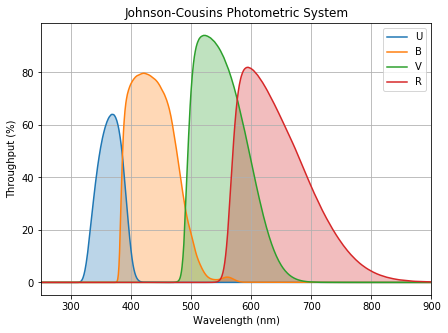

In [12]:
#Run this cell to plot the Johnson-Cousins UBVRI filter profiles
filters = ['Bessel_U-1.txt','Bessel_B-1.txt','Bessel_V-1.txt','Bessel_R-1.txt']
filtname=['U','B','V','R']
%matplotlib inline
fig, ax = plt.subplots(1,figsize=(7,5))
ax.set_title("Johnson-Cousins Photometric System")
ax.grid(True, zorder=5)

bdata = ascii.read(filters[1])
vdata = ascii.read(filters[2])

for i, filter in enumerate(filters):
    data = ascii.read(filter)
    wav = data['col1']
    thru = data['col2']
    ax.plot(wav,thru,label=filtname[i])
    ax.fill(wav,thru, zorder=0,alpha=0.3,label='')

ax.legend()
plt.xlabel('Wavelength (nm)')
plt.ylabel('Throughput (%)')
plt.xlim(250,900)

<big> When we measure magnitudes for a star in more than one filter (e.g. m$_B$ and m$_V$), we can measure the difference between these magnitudes to obtain a <font color=blue><b>color index</font></b>, B-V.  The color index gives you a rough idea hot hot a star is.  Generally, red stars (large color index) are cooler and blue stars (low color index) are hotter.<p>
    
To examine why, we need to understand how a star's spectrum depends on temperature.  Stars radiate approximately like blackbodies, which are described by the <font color=blue><b>Planck function</font></b>.  A blackbody's spectrum depends only on temperature. I've defined the Planck function for you below, and have plotted it (run next two cells).  Play with the temperature value in the next cell to see how the spectrum (and color index you would measure) changes.

In [13]:
##### Try adjusting the temperature below, then run the next cell!
temp = 5000

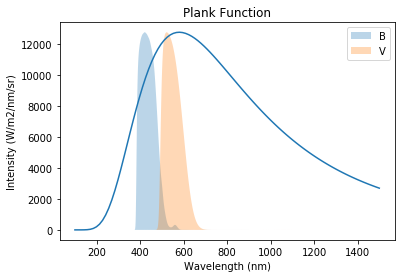

In [14]:
#define Planck Function
def planck_function(wavelength, temp):
    '''inputs should be in nanometers and Kelvin'''
    h = 6.626e-34 # m2 kg / s
    k = 1.381e-23 #m2 kg s-2 K-1
    c = 3.0e8 #m/s
    
    wavelength = wavelength/1e9 #convert to meters
    top = 2*h*c**2/wavelength**5
    bottom = (np.exp((h*c)/(wavelength*k*temp)) - 1)
    funct = top/bottom / 1e9 #convert to W/m2/nm/sr
    return funct
    
lam = np.linspace(100, 1500, num=100)
intensity = planck_function(lam, temp)

#Plot the Planck Function
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (W/m2/nm/sr)")
plt.title("Plank Function")
plt.plot(lam,intensity)

wav = bdata['col1']
thru = bdata['col2']/np.max(bdata['col2'])*np.max(intensity)
plt.fill(wav,thru, zorder=0,alpha=0.3,label='B')
wav = vdata['col1']
thru = vdata['col2']/np.max(vdata['col2'])*np.max(intensity)
plt.fill(wav,thru, zorder=0,alpha=0.3,label='V')
plt.legend()

<big>Now let's plot some of the data from the <b><font color=blue>Hipparcos catalog</font></b> that we previously stored as <tt>bmag</tt>, <tt>vmag</tt>, <tt>dist</tt>. <p>
    
<h4>Question 6: In this exercise you will plot a <font color=red>Color-Magnitude diagram</font> for the Hipparcos data.  </h4>
<li>First, convert the list of Hipparcos B-magnitudes into <em>absolute</em> B magnitudes using equation 4.<p>
<li>Next, calculate the B-V color indices for the Hipparcos stars <p>
<li>Finally, create the color-magnitude diagram by plotting the Absolute V magnitude as a function of B-V.  Don't forget to label your plot and axes using <tt>plt.xlabel("xlabel" )</tt>, <tt>plt.ylabel("ylabel")</tt>, <tt>plt.title("title")</tt><p>
<li>Since smaller magnitudes are brighter, we typically plot magntiude as decreasing along the y-axis.  You can invert the y-axis of your plot using <tt>plt.ylim(plt.ylim()[::-1])</tt>

Text(0,0.5,'V')

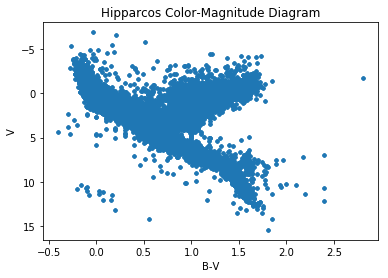

In [15]:
#Use this cell to code your solution for question #6.

abs_vmag = vmag+5 - 5*np.log10(dist)
plt.title('Hipparcos Color-Magnitude Diagram')
b_v = bmag-vmag
plt.plot(b_v,abs_vmag,'.')
plt.ylim(plt.ylim()[::-1]) #invert y-axis
plt.xlabel("B-V")
plt.ylabel("V")

<font color=red>Instructor solution for question #6  - double click to view</font>
<!--
abs_vmag = vmag+5 - 5*np.log10(dist)
plt.title('Hipparcos Color-Magnitude Diagram')
b_v = bmag-vmag
plt.plot(b_v,abs_vmag,'.')
plt.ylim(plt.ylim()[::-1]) #invert y-axis
plt.xlabel("B-V")
plt.ylabel("V")
-->

<h4>Question 7:</h4>
<li> What patterns/groupings of stars can you identify in your color-magnitude diagram?<p>
<li> What physical quantity does the x-axis (color index) correspond to? (Luminosity, Flux, Distance, Temperature?)<p>
<li> What physial quantity does the y-axis (absoulte V magnitude) correspond to? (Luminosity, Flux, Distance, Temperature?)<p>
<li> How do you think the radii of stars changes on this diagram?<p>

After thinking about the above questions you are prepared to learn about the Hertzsprung-Russell Diagram, one of the most important diagrams in astronomy!

<font color=red>Instructor solution for question #7  - double click to view</font>
<!--
 Nothing here yet.
-->